In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Now importing the dataset
df = pd.read_excel('/content/Airline_Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
#Checking and Removing Null Values from dataset
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#Now checking the shape of the dataset
df.shape
#We can see that we have 11 columns and 10682 rows

(10682, 11)

In [ ]:
#Now checking the datatypes of all the columns
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
#Now creating a function to change datatype into pandas datetime object
def change_to_datetime(c):
  df[c] = pd.to_datetime(df[c])

In [ ]:
#Now converting these columns to datetime datatype
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_to_datetime(i)

In [ ]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [ ]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
#Now creating a function to extract Hours and Minutes
def extract_hour(d,c):
    d[c+'_hour']=d[c].dt.hour
    
def extract_min(d,c):
    d[c+'_minute']=d[c].dt.minute
    
def drop_column(d,c):
    d.drop(c,axis=1,inplace=True)

In [ ]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_column(df,'Dep_Time')

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20


In [ ]:
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_column(df,'Arrival_Time')

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [ ]:
#Converting Duration into a proper m,h format
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' '+ '0m'
        else:
             duration[i]='0h'+' ' + duration[i]

In [ ]:
df['Duration'] = duration

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [ ]:
#Creating two functions to split duration hours and minutes
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [ ]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(minute)
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [ ]:
df.drop(columns=['Duration'],inplace=True)

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [ ]:
#converting duration hours and minutes to int
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)

In [ ]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [ ]:
#splitting categorical data
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
cont_col=[col for col in df.columns if df[col].dtype!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [ ]:
categorical= df[cat_col]

In [ ]:
categorical.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [ ]:
#counting the number of flights of each airline
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

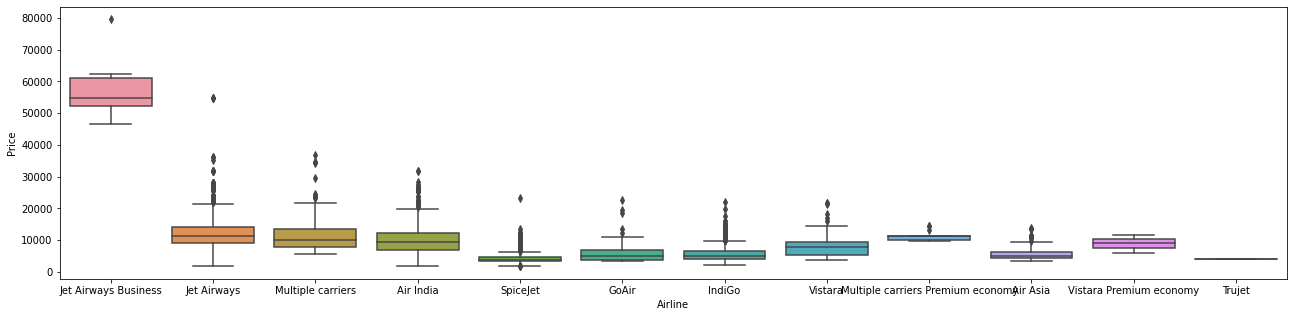

In [ ]:
plt.figure(figsize=(22,5))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
Source.rename(columns={'Chennai':'S_Chennai','Delhi':'Source_Delhi','Kolkata':'S_Kolkata','Mumbai':'S_Mumbai'},inplace=True)
Source.head()

,S_Chennai,Source_Delhi,S_Kolkata,S_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
Destination.rename(columns={'Cochin':'D_Cochin','Delhi':'D_Delhi','Hyderabad':'D_Hyderabad','Kolkata':'D_Kolkata','New Delhi':'D_New_Delhi'},inplace=True)
Destination.head()

,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
drop_column(categorical, 'Route')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN


In [ ]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [ ]:
for i in ['Route_3', 'Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [ ]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
for i in [ 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
drop_column(categorical, 'Additional_Info')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical.head(1)

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5


In [ ]:
data=pd.concat([categorical,Airline,Source,Destination,df[cont_col]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,Source_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,Source_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


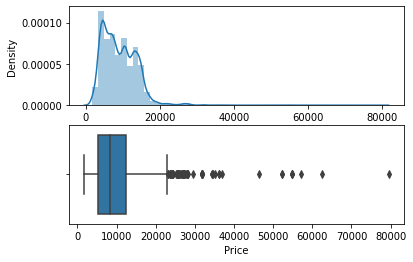

In [ ]:
plot(data,'Price')

In [ ]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


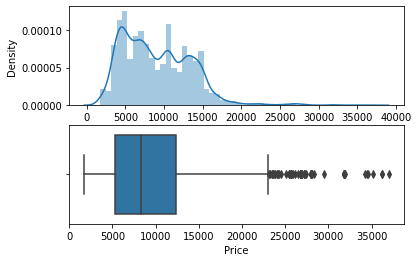

In [ ]:
plot(data,'Price')

In [ ]:
#splitting the data
X=data.drop(['Price','Route_1','Route_2','Route_3','Route_4','Route_5','Dep_Time_hour','Dep_Time_minute','Arrival_Time_minute','Arrival_Time_hour','Duration_hours','Duration_mins'],axis=1)
X.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,Source_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New_Delhi,journey_day,journey_month
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1


In [ ]:
X.dtypes

Total_Stops                          int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
S_Chennai                            uint8
Source_Delhi                         uint8
S_Kolkata                            uint8
S_Mumbai                             uint8
D_Cochin                             uint8
D_Delhi                              uint8
D_Hyderabad                          uint8
D_Kolkata                            uint8
D_New_Delhi                          uint8
journey_day                          int64
journey_month                        int64
dtype: obje

In [ ]:
X['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
X.shape

(10682, 23)

In [ ]:
y=data['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn import metrics
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("Linear Regression")
print("RMSE : ",rmse)
print("r2 score",metrics.r2_score(y_test,predictions))

Linear Regression
RMSE :  2651.088559205633
r2 score 0.6188537385523614


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn import metrics
model = RandomForestRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("Random Forest Regressor")
print("RMSE : ",rmse)
print("r2 score",metrics.r2_score(y_test,predictions))

Random Forest Regressor
RMSE :  1943.8997839549133
r2 score 0.7950768909766659


In [ ]:
'''import pickle
file = open('model.pkl','wb')
pickle.dump(model,file)'''

"import pickle\nfile = open('model.pkl','wb')\npickle.dump(model,file)"

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("KNeighbourRegressor")
print("RMSE : ",rmse)
print("r2 score",metrics.r2_score(y_test,predictions))

KNeighbourRegressor
RMSE :  2178.6851497563466
r2 score 0.7425860139871576


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("Decision Tree Regressor")
print("RMSE : ",rmse)
print("r2 score",metrics.r2_score(y_test,predictions))

Decision Tree Regressor
RMSE :  2016.8471409474025
r2 score 0.7794083034413251


In [ ]:
predictions[0:10]

array([ 4129.        ,  5601.        ,  6029.44444444,  6237.09090909,
       10371.125     ,  5022.625     , 10847.97674419, 13081.        ,
       12927.7       ,  6451.        ])

In [ ]:
df['Price'][0:10]

0     3897
1     7662
2    13882
3     6218
4    13302
5     3873
6    11087
7    22270
8    11087
9     8625
Name: Price, dtype: int64

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("Ridge")
print("RMSE : ",rmse)
print("r2 score",metrics.r2_score(y_test,predictions))

Ridge
RMSE :  2650.8654370162017
r2 score 0.6189178922822484


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("Lasso")
print("RMSE : ",rmse)
print("r2 score",metrics.r2_score(y_test,predictions))

Lasso
RMSE :  2651.4464007723705
r2 score 0.6187508380439815
